# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './train.p'
testing_file = './test.p'
print('Loading training and testing Data')
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
print('Finished loading data')

Loading training and testing Data
(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)
(12630,)
Finished loading data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
# normalize the X_train
X_train = X_train/ 255. * 0.9 + 0.1

# dropout Value
dropout_val = 0.75

In [4]:
# Set aside the validation data: 20% of training data
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32, 3)
4


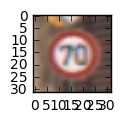

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
# print(X_train[index])
image = X_train[index].squeeze()
print (image.shape)

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

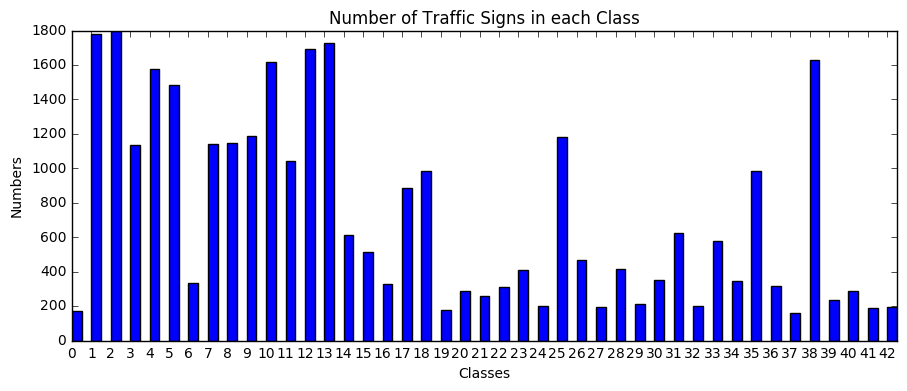

In [6]:
from collections import Counter
Counter(np.array(y_train))

classes, counts = zip(*Counter(np.array(y_train)).items())

y_pos = np.arange(len(classes))
width = 0.5

plt.xticks(y_pos, classes)
plt.ylabel('Numbers')
plt.xlabel('Classes')
plt.title('Number of Traffic Signs in each Class')
plt.bar(y_pos, counts, width)
plt.subplots_adjust(right=1.5)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I just simply shuffled the training data after splitting 20% of data to be validation data. I have tried to add new data by generating the images from training data with a rotation as the paper "Traffic Sign Recognition with Multi-Scaled Convolution Network" by Piere Sermanet and Yann LeCun. But the Validataion Accuracy gets around 97%.
So I went without generated data added to training set.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I have split up the 20% training data to be validation data and no additional data were added due to not getting improvement on accuracy.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [9]:
from tensorflow.contrib.layers import flatten

def NeuralNet(x, dropout_val):    
    # Hyperparameters
    mu = 0
    sigma = 0.1    
    
    # Network Architecture Conv->Activation->Pooling->Conv->Activation->Pooling->Flattening->Fully Connect->Activation
    # ->dropout->Fully Connect Total of 4 layers.
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop out
    fc1    = tf.nn.dropout(fc1, dropout_val)
    
    # Layer 4: Fully Connected. Input = 512. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))    
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 

The Architecture ended up implemented is Convolution based Neural Network with 4 layers total. The hper parameters that were selected are '0' mean and 0.1 standard deviation.

First Layer is ConvNet with output size of 28 x 28 with depth of 32 and stride 1 with 'Valid' padding. After that with ReLu activation and max pooling to get output of 14x14x32 by using k as 2x2 and strides of 2x2.

The second layer is also a Convolution Layer with out put of 10x10 and depth of 64 using the same stride and padding as the first layer. Then run ReLu activation and max pooling to get 5x5 with 64 depth size of output. And flatten it to be 1 D with output of 1600.

The third layer is a fully connected layer which output size is 512. Then run the ReLu activation before applying dropout of 0.75.

The fourth layer is also a fully connected layer with final output size of 43.

This seems to be acheiving better accuracy at 10 epochs and batch size of 128. I have tried other methods like generating the data and it seems to not improve better than this architecture with these parameters.  
 

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.
# place holder for a batch of input images and lables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
# add dropout
dropout_var = tf.placeholder(tf.float32)

In [11]:
# Training Pipeline
rate = 0.001

logits = NeuralNet(x, dropout_val)
prediction = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
# Training the Model
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_var: dropout_val})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'neuralnet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.900

EPOCH 2 ...
Validation Accuracy = 0.960

EPOCH 3 ...
Validation Accuracy = 0.971

EPOCH 4 ...
Validation Accuracy = 0.981

EPOCH 5 ...
Validation Accuracy = 0.981

EPOCH 6 ...
Validation Accuracy = 0.985

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.984

EPOCH 9 ...
Validation Accuracy = 0.985

EPOCH 10 ...
Validation Accuracy = 0.990

Model saved


In [14]:
# Evaluate the model
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('neuralnet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.935


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Using AdamOptimizer with 128 batch size and 10 epochs, 0 mean and 0.1 standard deviation to train this model.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with LeNet architecture just to see how it performs I got it around 95% accuracy with LeNet achitecture. 
Next step up was to go back and read a couple of papers like from ImageNet and the one above that I referred to see what kind of architecture will it work. 
Then started to change the dimensions of LeNet try to get better accuracy. That took me to add extra data by generating the training set data with some rotation to get more data, change hyperparameters until I got this architecture with dimensions and parameters that I used in this project which gives me better than 98%. Simplicity is always in my mind to solve any problems where I consider the time to train the model as well.
Since this model might not be suitable for the large data set but for this data set it is quite okay. Of course I think I might be able to improve this by using thoughtful added data as well as adding L2 regularization or normalize the training data set. Also I would like to try out with changing the training data to be in grayscale.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


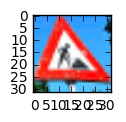

(32, 32, 3)


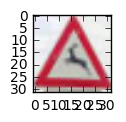

(32, 32, 3)


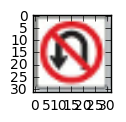

(32, 32, 3)


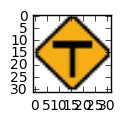

(32, 32, 3)


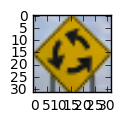

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from matplotlib import image as mpimg
import numpy as np

images = ['construction.png', 'deer.png', 'nouturn.png', 'tjct.png', 'zone.png']
new_signs = []
for img_name in images:
    image = mpimg.imread('images/' + img_name)
    print(np.array(image).shape)
    new_signs.append(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I selected these new five images which are not quite well fit into the classes that from what we trained our model but also are closed enough to get some confusion which I would like to see what will happen from this models. I would think it would be difficult for these images to be classified with the model.

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('neuralnet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    new_signs_predictions = sess.run(prediction, feed_dict={x: new_signs})

print(new_signs_predictions)

[[  4.85157913e-29   8.52443451e-30   6.09900265e-36   3.52175334e-26
    1.28591618e-32   9.26082091e-21   0.00000000e+00   5.07689655e-27
    2.25156814e-29   0.00000000e+00   1.32735449e-30   1.27828978e-27
    0.00000000e+00   4.55794502e-31   4.74136237e-29   5.94778571e-32
    0.00000000e+00   0.00000000e+00   3.54021095e-31   2.44899554e-33
    1.72483766e-20   1.04310782e-25   5.04052474e-18   2.56475444e-25
    1.29960091e-17   1.00000000e+00   6.37343784e-29   3.29330448e-36
    1.40960106e-24   9.25969718e-12   1.32875846e-14   2.59038459e-20
    0.00000000e+00   3.80252439e-33   1.11762523e-30   8.32782821e-29
    6.25469753e-36   0.00000000e+00   0.00000000e+00   4.77137841e-34
    6.26658965e-29   0.00000000e+00   0.00000000e+00]
 [  7.82602298e-20   2.24373603e-10   1.09668308e-20   4.50741170e-13
    1.57323240e-23   8.20472867e-13   3.24656100e-24   5.57810640e-22
    0.00000000e+00   8.54834294e-21   1.42439984e-18   9.95157190e-13
    5.42027265e-25   1.63469522e-35 

In [17]:
print(np.argmax(new_signs_predictions[0])) # classified - road work (fed - construction)
print(np.argmax(new_signs_predictions[1])) # classified - Wild animal crossing (fed- deer crossing)
print(np.argmax(new_signs_predictions[2])) # classified - Speed Limit 80 ( fed - no uturn)
print(np.argmax(new_signs_predictions[3])) # classified - Speed Limit 70 ( fed - T Junction)
print(np.argmax(new_signs_predictions[4])) # classified - Stop (fed - Tire zone)

25
31
5
4
14


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Since the new signs are picked different than the training data intentionally, I was suprised that it get almost 2 out of 5 signs are classified right. It turned out 40% correct. The last three images were classified wrong.

1) classified - road work (fed - construction)
2) classified - Wild animal crossing (fed- deer crossing)
3) classified - Speed Limit 80 ( fed - no uturn)
4) classified - Speed Limit 70 ( fed - T Junction)
5) classified - Stop (fed - Tire zone)

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('neuralnet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    print(sess.run(tf.nn.top_k(new_signs_predictions, k=3), feed_dict={x: new_signs}))

TopKV2(values=array([[  1.00000000e+00,   9.25969718e-12,   1.32875846e-14],
       [  1.00000000e+00,   4.86636687e-08,   4.41738202e-09],
       [  9.99998808e-01,   7.52739425e-07,   3.57635969e-07],
       [  9.19161379e-01,   7.50583708e-02,   3.01895291e-03],
       [  8.41554642e-01,   1.48257628e-01,   8.34545027e-03]], dtype=float32), indices=array([[25, 29, 30],
       [31, 21, 23],
       [ 5, 35, 19],
       [ 4,  1, 14],
       [14, 13,  1]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** For the third image which is 'no uturn' but the model predicted in 5, 35, 19 classess which are speed limit 80 km/h, Ahead only, Dangerous curve to left respectively and it seems like model could not be certain of this image feed. The fourth image which is 'T Junction' classified as 4 (speed limit 70 km/h), 1 (speed limit 30 km/h), 14 (stop); which the model wrongly classified as expected. The fifith image which was fed as 'tire zone' sign got predicted as: 14 (stop), 13 (yield),  1 (speed limit 30km/h) and seems like the model did not get certainty on this fed sign as well. These three images got predicted by the model and top 3 predictions for each sign are wrongly predicted.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.